# Implement the XOR network and the Gradient Descent Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
R = np.random.RandomState(42)

Defining the sigmoid function to be used as the activation function

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

This function will be used to count the number of incorrectly classified cases from the total of four different inputs

In [3]:
def num_incorrectly_classified(weights):
    inputs = [(0, 0), (0, 1), (1, 0), (1,1)]
    correct_out = [0, 1, 1, 0]
    result = 0
    for i in range(4):
        out = xor_net(np.array(inputs[i]), weights)
        out = out > 0.5 # Interpret the output as a "1" if it is greater than 0.5
        if out != correct_out[i]:
            result += 1
    return result

## Implement the function xor net(inputs, weights)

In [4]:
def xor_net(inputs, weights, node=None):
    """
    Simulates the network. Parameter node can be used to get the activation value of one of the hidden nodes, 
    instead of the output of the whole network.
    """
    vec_in = np.insert(inputs, 0, 1) # prepend bias value
    layer_1=np.empty((3, 2))
    layer_1[:, 0]=weights[0:3]
    layer_1[:, 1]=weights[3:6]
    layer_2=weights[6:9]
    out_1=vec_in.dot(layer_1)
    out_1=sigmoid(out_1)
    
    if node is not None:
        return out_1[node]
    
    out_1=np.insert(out_1, 0, 1) # prepend bias value
    out_2=out_1.dot(layer_2)
    out_2=sigmoid(out_2)
    return out_2

## Implement the error function mse(weights)

In [5]:
def mse(weights):
    inputs = [(0, 0), (0, 1), (1, 0), (1,1)]
    correct_out = [0, 1, 1, 0]
    error_sum = 0
    for i in range(len(inputs)):
        real_out = xor_net(np.array(inputs[i]), weights)
        error_sum += (real_out - correct_out[i])**2
    error = error_sum/len(inputs)
    return error

## Implement the gradient of the mse(weights) function, grdmse(weights)

In [6]:
def grdmse(weights):
    delta = np.empty((4, 3))
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    correct_out = [0, 1, 1, 0]

    result = np.zeros(9)

    for i in range(4): # average over all input-output pairs
        d = correct_out[i]
        inp = inputs[i]

        out = xor_net(inp, weights)
        
        delta[i, 2] = (d - out) * out * (1 - out)

        # output values of the hidden nodes
        h0 = xor_net(inputs[i], weights, node=0)
        h1 = xor_net(inputs[i], weights, node=1)

        delta[i, 0] = delta[i, 2] * weights[7] * h0 * (1 - h0)
        delta[i, 1] = delta[i, 2] * weights[8] * h1 * (1 - h1)
        
        # multiply all values by 1/4, because we are averaging
        result[6] += 0.25 * delta[i, 2]
        result[7] += 0.25 * delta[i, 2] * h0
        result[8] += 0.25 * delta[i, 2] * h1  

        result[0] += 0.25 * delta[i, 0]
        result[1] += 0.25 * delta[i, 0] * inputs[i][0]
        result[2] += 0.25 * delta[i, 0] * inputs[i][1]
        result[3] += 0.25 * delta[i, 1]
        result[4] += 0.25 * delta[i, 1] * inputs[i][0]
        result[5] += 0.25 * delta[i, 1] * inputs[i][1]
    
    return result


## Implement the gradient descent algorithm

In [7]:
w_initial = R.normal(0, 1, 9)

In [8]:
def train_xor_net(eta):
    """
    Trains the xor net for the given eta.
    Returns the resulting weights, and for each training iteration the MSE and number of incorrect outputs.
    """
    mse_values=[]
    number_incorrect=[]
    w = np.copy(w_initial)
    inc_predictions=num_incorrectly_classified(w)
    mse_values.append(mse(w))
    number_incorrect.append(inc_predictions)
    while inc_predictions > 0:
        w += eta * grdmse(w)
        inc_predictions=num_incorrectly_classified(w)
        mse_values.append(mse(w))
        number_incorrect.append(inc_predictions)
        
    print('Number of Loops = '+ str(len(mse_values)))
    return (w, mse_values, number_incorrect)

In [9]:
def print_xor_net_output(w):
    """
    Prints the output of the network for each possible input.
    """
    columns_labels=['Input 1' , 'Input 2' , 'Real Output' , 'Rounded Output']
    inputs = [(0, 0), (0, 1), (1, 0), (1,1)]
    result0 = xor_net(inputs[0],w)
    result1 = xor_net(inputs[1],w)
    result2 = xor_net(inputs[2],w)
    result3 = xor_net(inputs[3],w)
    final_results=pd.DataFrame([[inputs[0][0],inputs[0][1],result0,np.round(result0,0)],
                [inputs[1][0],inputs[1][1],result1,np.round(result1,0)],
                [inputs[2][0],inputs[2][1],result2,np.round(result2,0)],
                [inputs[3][0],inputs[3][1],result3,np.round(result3,0)]],columns=columns_labels)
    print(final_results.to_string(index=False))

In [10]:
def run(eta):
    """
    Trains the xor net and prints the results. Returns list of mse values and list of numbers of incorrectly classified inputs 
    found during the gradient descent iterations (for plotting).
    """
    (w, mse_values, number_incorrect) = train_xor_net(eta)
    print_xor_net_output(w)
    return (mse_values, number_incorrect)

Using $\eta=0.3$

In [11]:
(mses1, n_incorrect1) = run(0.3)

Number of Loops = 7899
 Input 1  Input 2  Real Output  Rounded Output
       0        0     0.328752             0.0
       0        1     0.500115             1.0
       1        0     0.777257             1.0
       1        1     0.352467             0.0


Using $\eta=0.6$

In [12]:
(mses2, n_incorrect2) = run(0.6)

Number of Loops = 3950
 Input 1  Input 2  Real Output  Rounded Output
       0        0     0.329484             0.0
       0        1     0.500039             1.0
       1        0     0.777116             1.0
       1        1     0.352130             0.0


Using $\eta=0.8$

In [13]:
(mses3, n_incorrect3) = run(0.8)

Number of Loops = 2963
 Input 1  Input 2  Real Output  Rounded Output
       0        0     0.329968             0.0
       0        1     0.500223             1.0
       1        0     0.777036             1.0
       1        1     0.351736             0.0


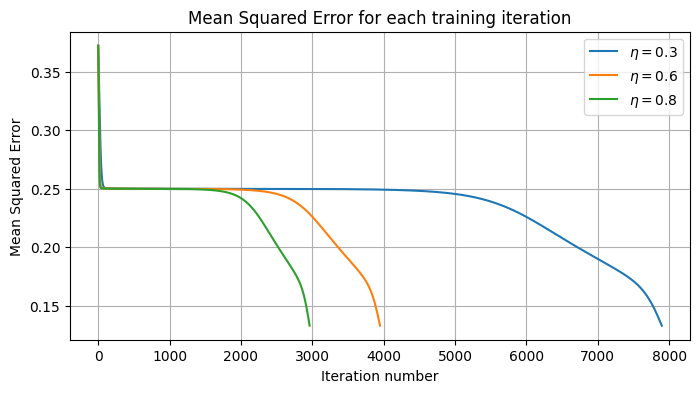

In [14]:
# Show a plot of MSE values over training iterations.
plt.figure(figsize=(8,4))
plt.title('Mean Squared Error for each training iteration')
plt.plot(mses1, label=r"$\eta=0.3$")
plt.plot(mses2, label=r"$\eta=0.6$")
plt.plot(mses3, label=r"$\eta=0.8$")
plt.xlabel('Iteration number')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.legend()
plt.savefig("mse_1.png")
plt.show()

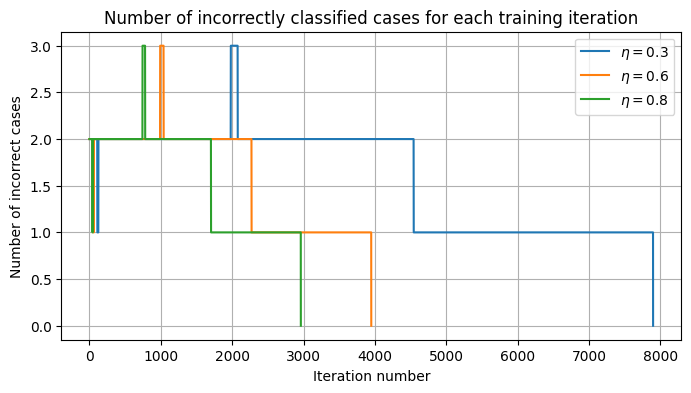

In [15]:
# Show a plot of number of incorrect outputs over training iterations.
plt.figure(figsize=(8,4))
plt.title('Number of incorrectly classified cases for each training iteration')
plt.plot(np.arange(0,len(n_incorrect1)), n_incorrect1, label=r"$\eta=0.3$")
plt.plot(np.arange(0,len(n_incorrect2)), n_incorrect2, label=r"$\eta=0.6$")
plt.plot(np.arange(0,len(n_incorrect3)), n_incorrect3, label=r"$\eta=0.8$")
plt.xlabel('Iteration number')
plt.ylabel('Number of incorrect cases')
plt.grid()
plt.legend()
plt.savefig("incorrect_1.png")
plt.show()

## Use a different initialization strategy

We initialize the weights using a uniform $\mathcal{U}(-1,1)$ distribution instead of the normal $\mathcal{N}(0,1)$ distribution.

In [16]:
w_initial = R.uniform(-1, 1, 9)

In [17]:
(mses4, n_incorrect4) = run(0.3)

Number of Loops = 5273
 Input 1  Input 2  Real Output  Rounded Output
       0        0     0.155670             0.0
       0        1     0.689483             1.0
       1        0     0.701749             1.0
       1        1     0.499963             0.0


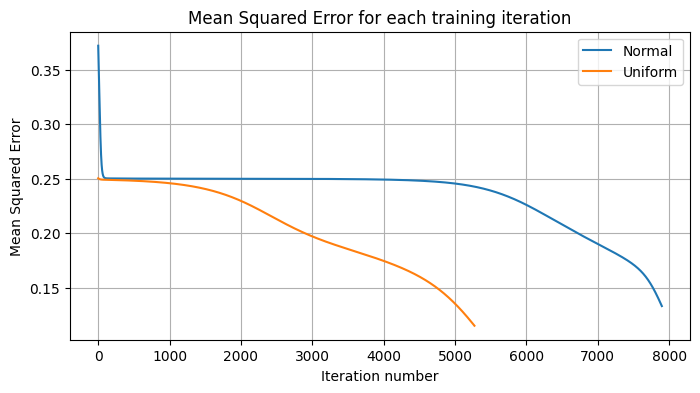

In [18]:
# Show a plot of MSE values over training iterations.
plt.figure(figsize=(8,4))
plt.title('Mean Squared Error for each training iteration')
plt.plot(mses1, label=r"Normal")
plt.plot(mses4, label=r"Uniform")
plt.xlabel('Iteration number')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.legend()
plt.savefig("mse_2.png")
plt.show()

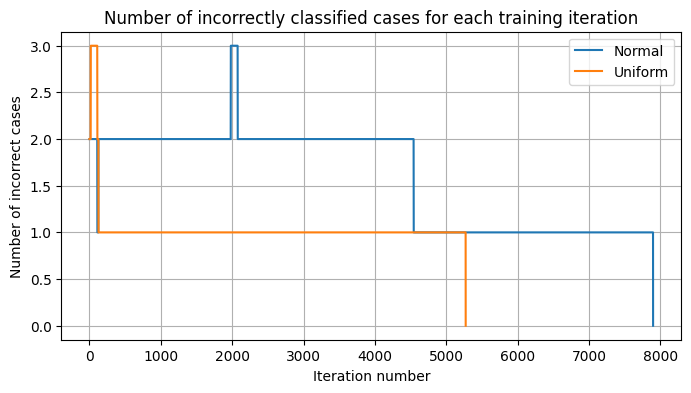

In [19]:
# Show a plot of number of incorrect outputs over training iterations.
plt.figure(figsize=(8,4))
plt.title('Number of incorrectly classified cases for each training iteration')
plt.plot(np.arange(0,len(n_incorrect1)), n_incorrect1, label=r"Normal")
plt.plot(np.arange(0,len(n_incorrect4)), n_incorrect4, label=r"Uniform")
plt.xlabel('Iteration number')
plt.ylabel('Number of incorrect cases')
plt.grid()
plt.legend()
plt.savefig("incorrect_2.png")
plt.show()

### Lazy approach

In [20]:
def train_xor_net_lazy():
    """
    Trains the xor net using the lazy approach.
    Returns the resulting weights, and for each training iteration the MSE and number of incorrect outputs.
    """
    mse_values=[]
    number_incorrect=[]
    w = R.normal(0, 1, 9)
    inc_predictions=num_incorrectly_classified(w)
    mse_values.append(mse(w))
    number_incorrect.append(inc_predictions)
    while num_incorrectly_classified(w) > 0:
        w = R.normal(0, 1, 9)
        inc_predictions=num_incorrectly_classified(w)
        mse_values.append(mse(w))
        number_incorrect.append(inc_predictions)
        
    print('Number of Loops = '+ str(len(mse_values)))
    return (w, mse_values, number_incorrect)

In [21]:
def run_lazy():
    """
    Trains the xor net using the lazy approach and prints the results.
    """
    (w, mse_values, number_incorrect) = train_xor_net_lazy()
    print_xor_net_output(w)

#### Training attempt 1

In [22]:
run_lazy()

Number of Loops = 43016
 Input 1  Input 2  Real Output  Rounded Output
       0        0     0.491724             0.0
       0        1     0.503067             1.0
       1        0     0.500061             1.0
       1        1     0.496210             0.0


#### Training attempt 2

In [23]:
run_lazy()

Number of Loops = 8992
 Input 1  Input 2  Real Output  Rounded Output
       0        0     0.495536             0.0
       0        1     0.501125             1.0
       1        0     0.512256             1.0
       1        1     0.493403             0.0


#### Training attempt 3

In [24]:
run_lazy()

Number of Loops = 271175
 Input 1  Input 2  Real Output  Rounded Output
       0        0     0.499857             0.0
       0        1     0.522962             1.0
       1        0     0.514804             1.0
       1        1     0.497807             0.0


#### Training attempt 4

In [25]:
run_lazy()

Number of Loops = 151100
 Input 1  Input 2  Real Output  Rounded Output
       0        0     0.473420             0.0
       0        1     0.510150             1.0
       1        0     0.501687             1.0
       1        1     0.498089             0.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e562478f-16e9-4aa2-a205-fdebc346768a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>